In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/amritpal-singh/Downloads/Churn-Data.csv")
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.TotalCharges.isnull().sum()
df = df.drop(columns = ["cID"])

As there are only 10 nan columns in the TotalCharges we can remove them.

In [5]:
df = df.dropna(subset=['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5624 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5624 non-null   object 
 1   SeniorCitizen     5624 non-null   int64  
 2   Partner           5624 non-null   object 
 3   Dependents        5624 non-null   object 
 4   tenure            5624 non-null   int64  
 5   PhoneService      5624 non-null   object 
 6   MultipleLines     5624 non-null   object 
 7   InternetService   5624 non-null   object 
 8   OnlineSecurity    5624 non-null   object 
 9   OnlineBackup      5624 non-null   object 
 10  DeviceProtection  5624 non-null   object 
 11  TechSupport       5624 non-null   object 
 12  TV_Streaming      5624 non-null   object 
 13  Movie_Streaming   5624 non-null   object 
 14  Contract          5624 non-null   object 
 15  PaperlessBilling  5624 non-null   object 
 16  Method_Payment    5624 non-null   object 
 17  

In [6]:
def checkingUnique():
    for i in df.columns:
        print(i, " : ", df[i].unique())
        print(len(df[i].unique()))
checkingUnique()

gender  :  ['Female' 'Male']
2
SeniorCitizen  :  [0 1]
2
Partner  :  ['No' 'Yes']
2
Dependents  :  ['Yes' 'No']
2
tenure  :  [21 54  1  4  7 32 72 19 10 45 40 47 36 69 71 35  3 68 42  8 46 12 26 49
 33 31 66 58 13 57  6 59 15 27 34 18  5 39 29  2 63 20 14 56 37 24 52 43
 11 16 50 38 23 55 48 53 70 22 28 44 65 64 60 51  9 25 61 30 17 41 67 62]
72
PhoneService  :  ['Yes' 'No']
2
MultipleLines  :  ['No' 'Yes' 'No phone service']
3
InternetService  :  ['DSL' 'Fiber optic' 'No']
3
OnlineSecurity  :  ['Yes' 'No' 'No internet service']
3
OnlineBackup  :  ['No' 'Yes' 'No internet service']
3
DeviceProtection  :  ['Yes' 'No' 'No internet service']
3
TechSupport  :  ['No' 'No internet service' 'Yes']
3
TV_Streaming  :  ['No' 'Yes' 'No internet service']
3
Movie_Streaming  :  ['Yes' 'No' 'No internet service']
3
Contract  :  ['One year' 'Two year' 'Month-to-month']
3
PaperlessBilling  :  ['No' 'Yes']
2
Method_Payment  :  ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df.loc[:,col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80,0
1,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45,0
2,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95,1
5,1,0,0,0,7,1,0,1,0,0,0,0,0,0,0,1,2,69.55,521.35,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5624 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5624 non-null   object 
 1   SeniorCitizen     5624 non-null   int64  
 2   Partner           5624 non-null   object 
 3   Dependents        5624 non-null   object 
 4   tenure            5624 non-null   int64  
 5   PhoneService      5624 non-null   object 
 6   MultipleLines     5624 non-null   object 
 7   InternetService   5624 non-null   object 
 8   OnlineSecurity    5624 non-null   object 
 9   OnlineBackup      5624 non-null   object 
 10  DeviceProtection  5624 non-null   object 
 11  TechSupport       5624 non-null   object 
 12  TV_Streaming      5624 non-null   object 
 13  Movie_Streaming   5624 non-null   object 
 14  Contract          5624 non-null   object 
 15  PaperlessBilling  5624 non-null   object 
 16  Method_Payment    5624 non-null   object 
 17  

In [9]:
for col in df.select_dtypes(include=['object']).columns :
    df[col] = df[col].astype('int8')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5624 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5624 non-null   int8   
 1   SeniorCitizen     5624 non-null   int64  
 2   Partner           5624 non-null   int8   
 3   Dependents        5624 non-null   int8   
 4   tenure            5624 non-null   int64  
 5   PhoneService      5624 non-null   int8   
 6   MultipleLines     5624 non-null   int8   
 7   InternetService   5624 non-null   int8   
 8   OnlineSecurity    5624 non-null   int8   
 9   OnlineBackup      5624 non-null   int8   
 10  DeviceProtection  5624 non-null   int8   
 11  TechSupport       5624 non-null   int8   
 12  TV_Streaming      5624 non-null   int8   
 13  Movie_Streaming   5624 non-null   int8   
 14  Contract          5624 non-null   int8   
 15  PaperlessBilling  5624 non-null   int8   
 16  Method_Payment    5624 non-null   int8   
 17  

In [11]:
checkingUnique()

gender  :  [0 1]
2
SeniorCitizen  :  [0 1]
2
Partner  :  [0 1]
2
Dependents  :  [1 0]
2
tenure  :  [21 54  1  4  7 32 72 19 10 45 40 47 36 69 71 35  3 68 42  8 46 12 26 49
 33 31 66 58 13 57  6 59 15 27 34 18  5 39 29  2 63 20 14 56 37 24 52 43
 11 16 50 38 23 55 48 53 70 22 28 44 65 64 60 51  9 25 61 30 17 41 67 62]
72
PhoneService  :  [1 0]
2
MultipleLines  :  [0 2 1]
3
InternetService  :  [0 1 2]
3
OnlineSecurity  :  [2 0 1]
3
OnlineBackup  :  [0 2 1]
3
DeviceProtection  :  [2 0 1]
3
TechSupport  :  [0 1 2]
3
TV_Streaming  :  [0 2 1]
3
Movie_Streaming  :  [2 0 1]
3
Contract  :  [1 2 0]
3
PaperlessBilling  :  [0 1]
2
Method_Payment  :  [3 0 2 1]
4
Charges_Month  :  [64.85 97.2  23.45 ... 59.25 35.35 21.15]
1494
TotalCharges  :  [1336.8  5129.45   23.45 ...  306.05 1200.15  457.3 ]
5299
Churn  :  [0 1]
2


In [12]:
len(df[df['Churn'] == 1])

1496

In [13]:
len(df[df['Churn'] == 0])

4128

As there is a imbalance in the dataset we will use SMOTE 

In [14]:
from sklearn.model_selection import train_test_split

x = df.drop(['Churn'], axis=1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print("Original class distribution:", Counter(y_train))

print("Resampled class distribution:", Counter(y_train_smote))

Original class distribution: Counter({0: 3332, 1: 1167})
Resampled class distribution: Counter({0: 3332, 1: 3332})


Now the training data is perfectly balanced

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

model = RandomForestClassifier(random_state = 42)
model.fit(x_train_smote, y_train_smote)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1-score: {f1}')

Accuracy: 0.7671111111111111
F1-score: 0.7651379744651483


WELL training the model with smote techinque and without it doesnt make much defference in accuracy and f1 score. that means even though there is some difference in the sample the model didnt overfit

Now we will do Hyperparameter Tuning to find best parameter values for model to increase its accuracy and f1 score

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 300],
    'max_depth': [10, 20, 30, 50, 75, 100],
    'min_samples_split': [2, 5, 10, 15, 20]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(x_train_smote, y_train_smote)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average = 'weighted')

print(f'Best Accuracy: {accuracy_best}')
print(f'Best F1-score: {f1_best}')


Best Accuracy: 0.7608888888888888
Best F1-score: 0.7594476047880091


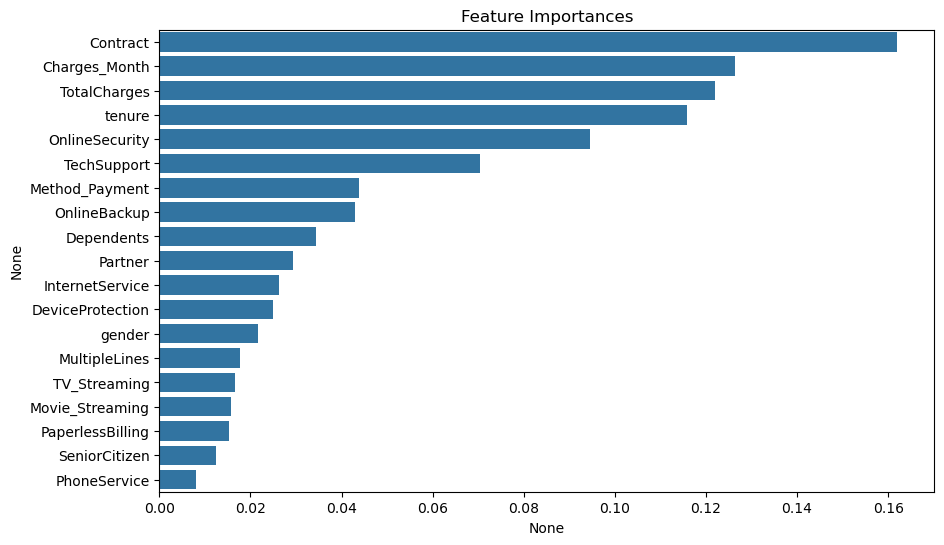

Columns : 
Contract            0.162056
Charges_Month       0.126283
TotalCharges        0.121917
tenure              0.115753
OnlineSecurity      0.094465
TechSupport         0.070486
Method_Payment      0.043753
OnlineBackup        0.042840
Dependents          0.034434
Partner             0.029262
InternetService     0.026344
DeviceProtection    0.024962
gender              0.021650
MultipleLines       0.017711
TV_Streaming        0.016672
Movie_Streaming     0.015762
PaperlessBilling    0.015224
SeniorCitizen       0.012488
PhoneService        0.007940
dtype: float64


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(best_model.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()
print(f'Columns : \n{feature_importances}')

From the above barplot we can see the importance of features.
Now we will train a model with around 95% most important column so see if the performance increases.

In [101]:
less_important_columns = ['PhoneService', 'SeniorCitizen', 'PaperlessBilling']

x_train_dropped = x_train.drop(columns=less_important_columns)
x_test_dropped = x_test.drop(columns=less_important_columns)

smote = SMOTE(random_state=42)
x_train_smote_dropped, y_train_smote_dropped = smote.fit_resample(x_train_dropped, y_train)

In [102]:
model_dropped = RandomForestClassifier(random_state=42)
model_dropped.fit(x_train_smote_dropped, y_train_smote_dropped)

y_pred_dropped = model_dropped.predict(x_test_dropped)

accuracy_dropped = accuracy_score(y_test, y_pred_dropped)
f1_dropped = f1_score(y_test, y_pred_dropped, average='weighted')

print(f'Accuracy with dropped features: {accuracy_dropped}')
print(f'F1-score with dropped features: {f1_dropped}')

Accuracy with dropped features: 0.7493333333333333
F1-score with dropped features: 0.7448508128122275


In [103]:
grid_search_dropped = GridSearchCV(estimator=model_dropped, param_grid=param_grid, cv=3, scoring='f1_weighted')
grid_search_dropped.fit(x_train_smote_dropped, y_train_smote_dropped)

best_model_dropped = grid_search_dropped.best_estimator_
y_pred_best_dropped = best_model_dropped.predict(x_test_dropped)

accuracy_best_dropped = accuracy_score(y_test, y_pred_best_dropped)
f1_best_dropped = f1_score(y_test, y_pred_best_dropped, average='weighted')

print(f'Best Accuracy with dropped features: {accuracy_best_dropped}')
print(f'Best F1-score with dropped features: {f1_best_dropped}')


Best Accuracy with dropped features: 0.7608888888888888
Best F1-score with dropped features: 0.7582611789625369


After trying removing different columns the accuracy didnt improved so making the model without dropped values 'best_model' the best estimator with 

**Best Accuracy: 0.7617777777777778** 

**Best F1-score: 0.7609073504273505**